# Proof of Concept

In [1]:
import pandas as pd

from abtesting import display_ab_test_results

In [2]:
experiment = pd.DataFrame({
    'groups': ['control', 'test'],
    'conversions': [478, 532],
    'totals': [5323, 5277]
})

Comparison,Confidence,Relative Increase
test converts higher than control,97%,"9,6%"


Group,Conversion,Total,Observed Rate
control,478,5323,8.98%
test,532,5277,10.08%


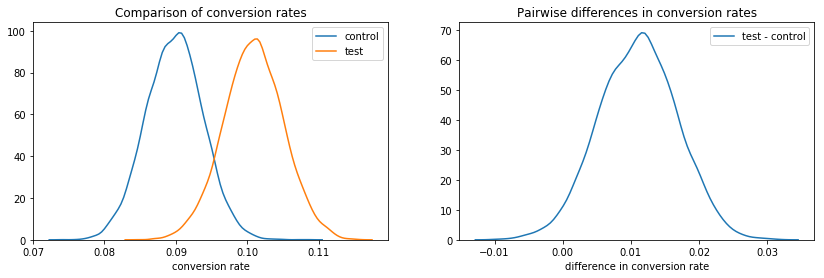

In [3]:
display_ab_test_results(experiment)